In [ ]:
import torch  # Main PyTorch library
import torch.nn as nn
import torch.optim as optim  # Optimization algorithms
import torch.nn.functional as F  # Functions
from torch.utils.data import DataLoader  # To load data
from torch.utils.data import Dataset  # To create new Datasets
from torchvision import datasets, transforms  # Datasets and image transformations

***Activation function***

In [14]:
def Relu(z):
    return torch.mac(torch.tensor(0), z)

def sigmoid(z):
    return 1 / (1 + torch.exp(-z))

def tanh(z):
    return torch.tanh(z)

def softmax(z):
    return torch.exp(z) / torch.sum(torch.exp(z))

# Single Layer Neural Networks

*Activation functions. The piecewise-linear ReLU function is popular for its efficiency and computability.*

In [15]:
class SingleLayerNN(nn.Module):
    def __init__(self):
        super(SingleLayerNN, self).__init__()
        # Single layer (linear transformation)
        self.fc = nn.Linear(input_size = 784 , output_size = 10)
    
    def forward(self, x):
        return self.fc(x)


# Multilayer Neural Networks

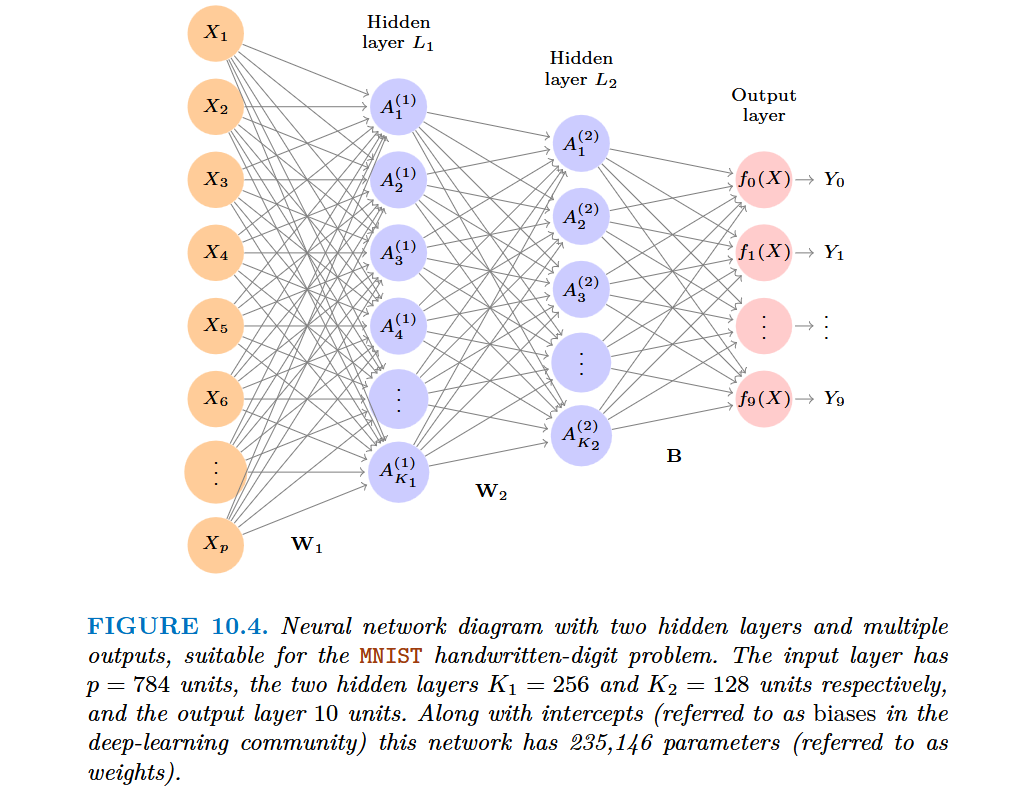

# CNN convolutional neural network

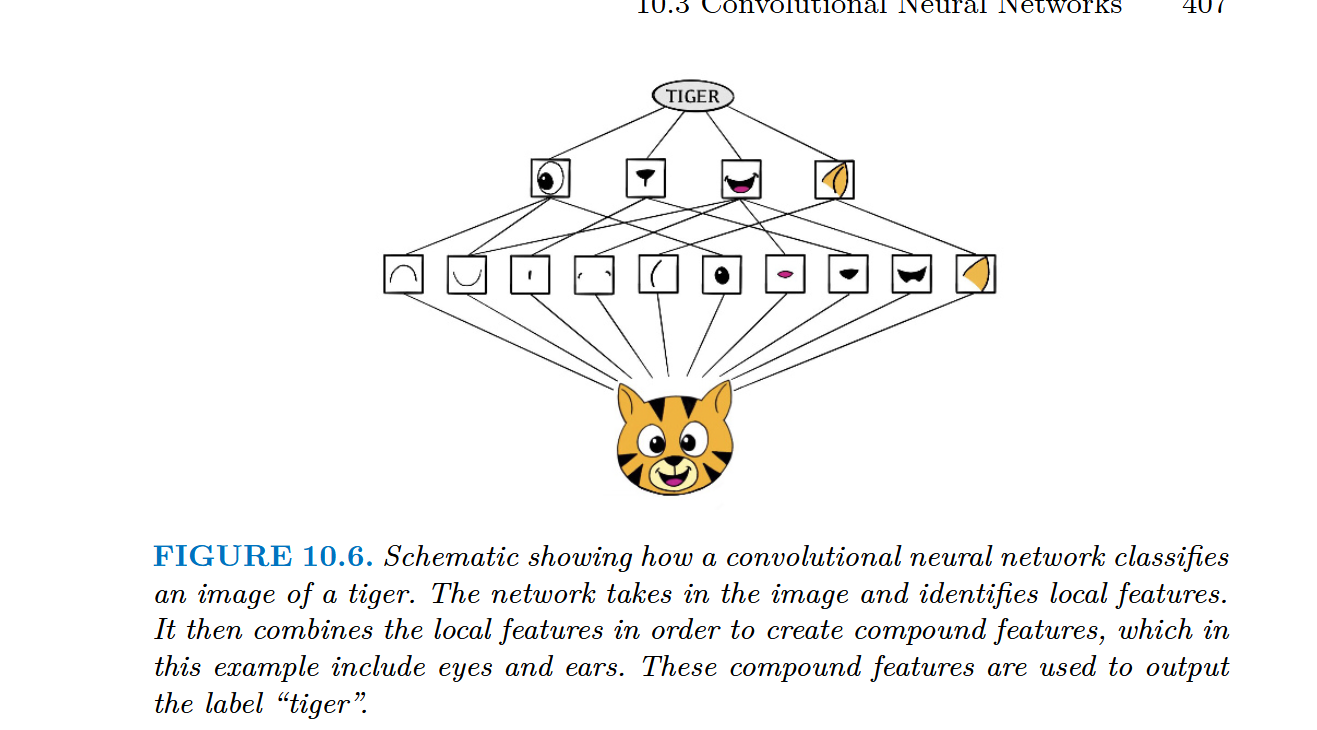

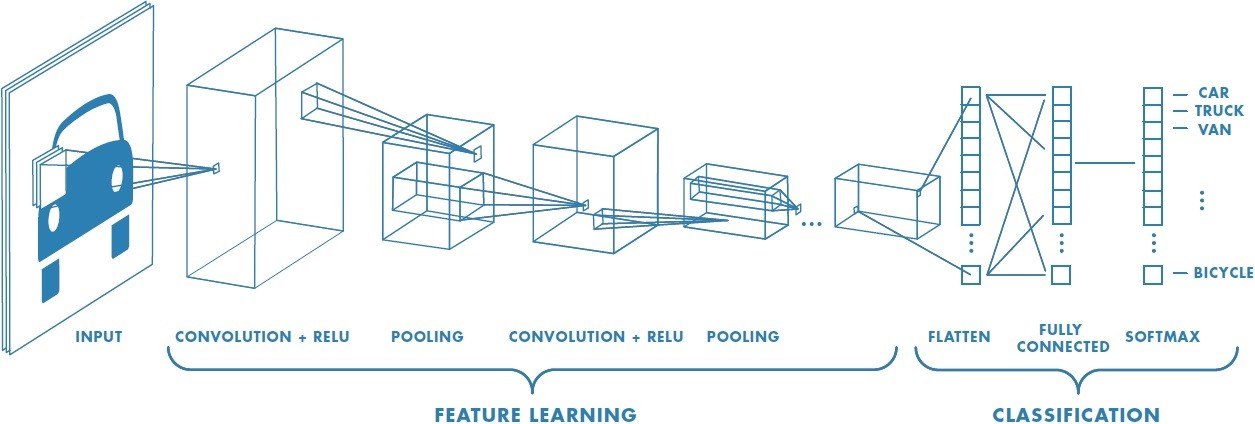

**Convolutional Layer**

- The convolutional layer is used to extract features from the input image. It is a mathematical operation between the input image and the kernel (filter). The filter is passed through the image and the output is calculated as follows:
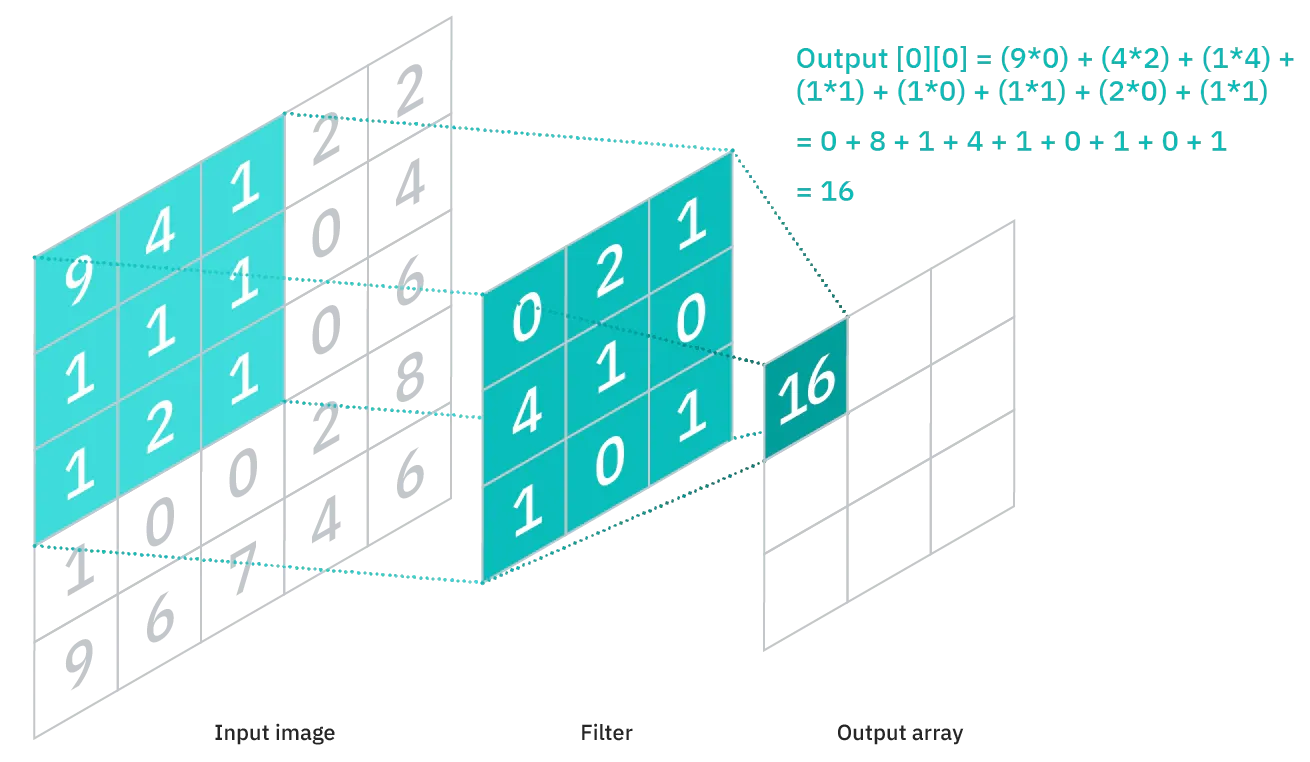

- Different filters are used to extract different kinds of features. Some common features are given below :

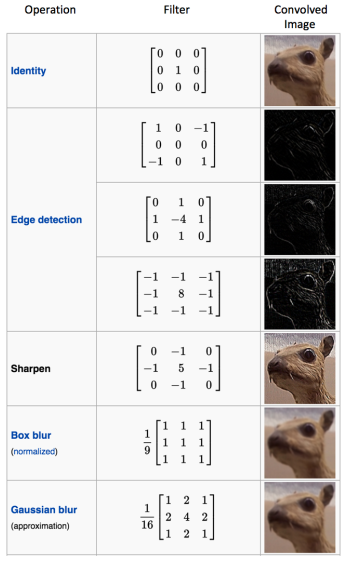

**Pooling Layers**

- Pooling layers are used to reduce the size of any image while maintaining the most important features. The most common types of pooling layers used are max and average pooling which take the max and the average value respectively from the given size of the filter (i.e, 2x2, 3x3, and so on).

- Max pooling, for example, would work as follows:

- 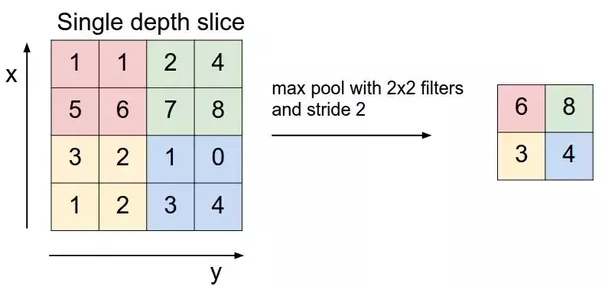

**Flow in the Model:**
1. Input image is passed through convolutional layers with ReLU activation and max pooling.
2. The resulting feature maps are flattened into a vector.
3. The vector is passed through fully connected layers with ReLU and dropout for regularization.
4. The final output is produced through the last fully connected layer (self.fc2), which in this case likely represents the predicted class (for a classification problem with 10 classes)

In [16]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        # Fully connected layers
        self.fc1 = nn.Linear(64*7*7, 128)
        self.fc2 = nn.Linear(128, 10)
        # Max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        # Dropout layer
        self.dropout = nn.Dropout(p=0.5)
    def forward(self, x):
        # Convolutional layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # Flatten the tensor
        x = x.view(-1, 64*7*7)
        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Data Loading: the Dataset

* Let’s start by loading some data. We will be using the CIFAR-10 dataset. The dataset has 60,000 color images (RGB) at 32px x 32px belonging to 10 different classes (6000 images/class). The dataset is divided into 50,000 training and 10,000 testing images.

- You can see a sample of the dataset along with their classes below:

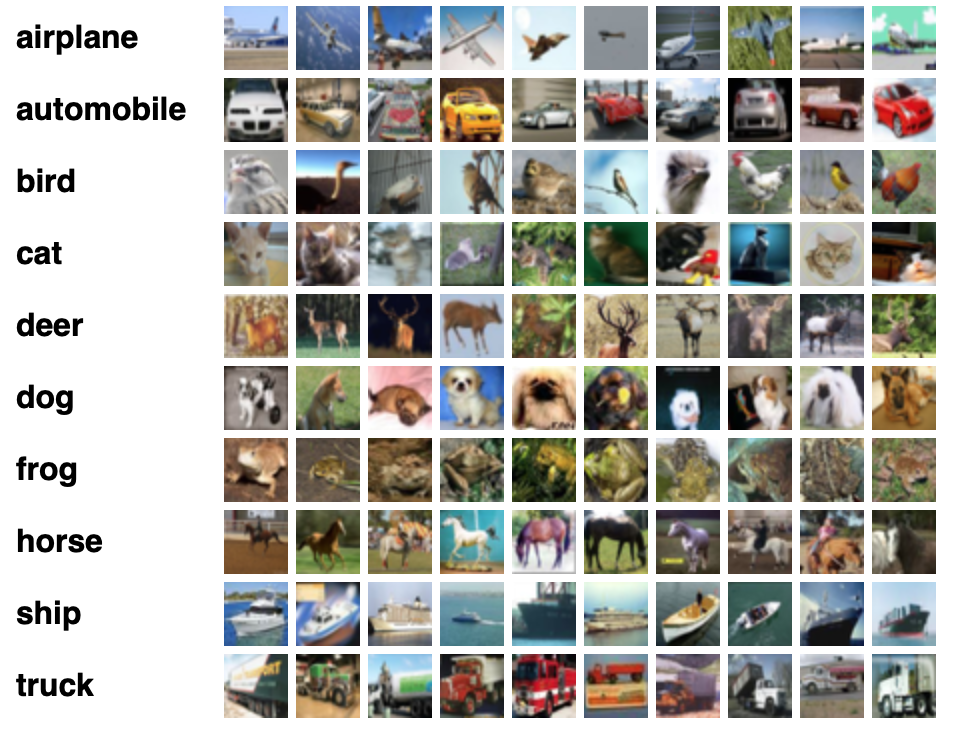

In [17]:
# Load in relevant libraries, and alias where appropriate
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

# Define relevant variables for the ML task
batch_size = 64
num_classes = 10
learning_rate = 0.001
num_epochs = 20

# Device will determine whether to run the training on GPU or CPU.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)

cuda


*Importing Libraries*

device will determine whether to run the training on GPU or CPU.
Dataset Loading

To load the dataset, we will be using the built-in datasets in torchvision. It provides us with the ability to download the dataset and also apply any transformations we want.

Let’s look at the code first:

In [18]:
# Use transforms.compose method to reformat images for modeling,
# and save to variable all_transforms for later use
all_transforms = transforms.Compose([transforms.Resize((32,32)),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
                                                          std=[0.2023, 0.1994, 0.2010])
                                     ])
# Create Training dataset
train_dataset = torchvision.datasets.CIFAR10(root = './data',
                                             train = True,
                                             transform = all_transforms,
                                             download = True)

# Create Testing dataset
test_dataset = torchvision.datasets.CIFAR10(root = './data',
                                            train = False,
                                            transform = all_transforms,
                                            download=True)

# Instantiate loader objects to facilitate processing
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)


test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

**Loading and Transforming Data**

Let’s dissect this piece of code:

- We start by writing some transformations. We resize the images, convert them to tensors and normalize them by using the mean and standard deviation of each band in the input images. You can calculate these as well, but they are available online.
- Then, we load the dataset: both training and testing. We set download equal to True so that it is downloaded if not already downloaded.
- Loading the whole dataset into the RAM at once is not a good practice and can seriously halt your computer. That’s why we use data loaders, which allow you to iterate through the dataset by loading the data in batches.
- We then create two data loaders (for train/test) and set the batch size, along with shuffle, equal to True, so that images from each class are included in a batch.


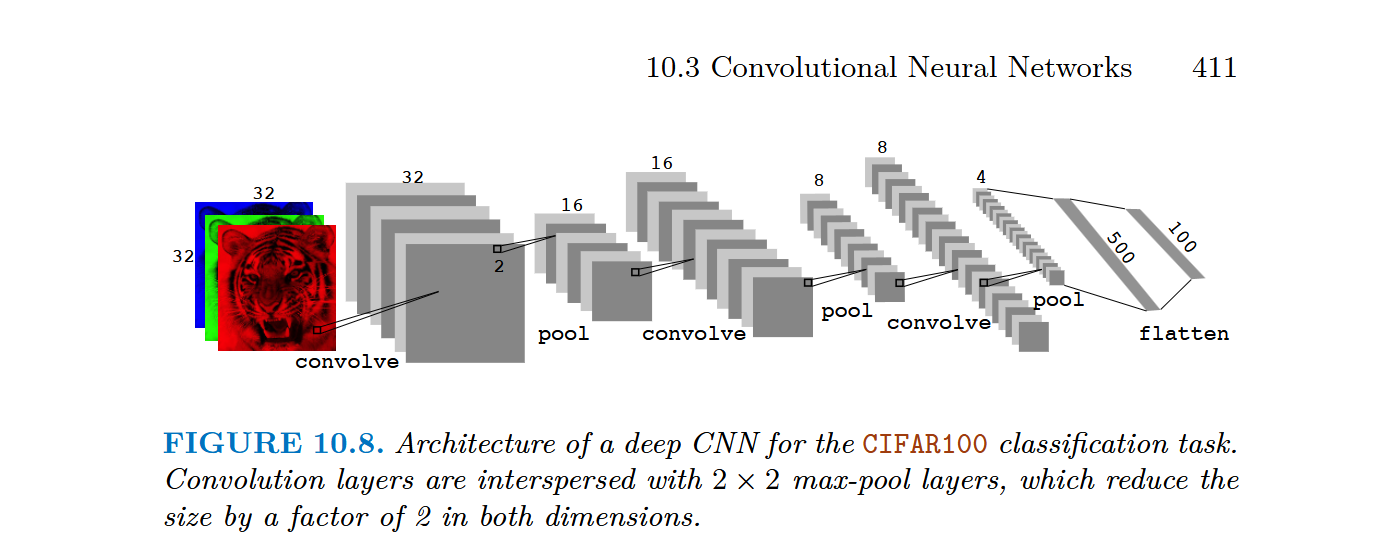

In [19]:
# Creating a CNN class
class ConvNeuralNet(nn.Module):
#  Determine what layers and their order in CNN object 
    def __init__(self, num_classes):
        super(ConvNeuralNet, self).__init__()
        self.conv_layer1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
        self.conv_layer2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3)
        self.max_pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        self.conv_layer3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.conv_layer4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
        self.max_pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        self.fc1 = nn.Linear(1600, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)
    
    # Progresses data across layers    
    def forward(self, x):
        out = self.conv_layer1(x)
        out = self.conv_layer2(out)
        out = self.max_pool1(out)
        
        out = self.conv_layer3(out)
        out = self.conv_layer4(out)
        out = self.max_pool2(out)
                
        out = out.reshape(out.size(0), -1)
        
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

In [20]:
import torch
import torch.nn as nn

class ConvNeuralNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNeuralNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.relu = nn.ReLU()  # Activation for fc1
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)  # Flatten the tensor
        out = self.fc1(out)
        out = self.relu(out)  # Apply activation function
        out = self.fc2(out)
        return out  # Return the output tensor


Why Sequential?

    This is a simple stack of layers: Convolution → Activation → Pooling.
    We don’t need any custom computations between layers.
    It makes the code cleaner and more readable.
    Reduces repetitive self.conv = nn.Conv2d(), self.relu = nn.ReLU(), etc.

**Setting Hyperparameters**

Let’s now set some hyperparameters for our training purposes

In [21]:
model = ConvNeuralNet(num_classes)

# Set Loss function with criterion
criterion = nn.CrossEntropyLoss()

# Set optimizer with optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = 0.005, momentum = 0.9)  

total_step = len(train_loader)

*Hyperparameters*

We start by initializing our model with the number of classes. We then choose cross-entropy and SGD (Stochastic Gradient Descent) as our loss function and optimizer respectively. There are different choices for these, but I found these to result in maximum accuracy when experimenting. We also define the variable total_step to make iteration through various batches easier.

**Training**

Now, let’s start training our model:

In [22]:
# Move the model to the device (GPU or CPU)
model.to(device)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        Loss = criterion(outputs, labels)
        optimizer.zero_grad()
        Loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, Loss.item()))
        
        

Epoch [1/20], Step [100/782], Loss: 2.2012
Epoch [1/20], Step [200/782], Loss: 2.1599
Epoch [1/20], Step [300/782], Loss: 1.9393
Epoch [1/20], Step [400/782], Loss: 1.7934
Epoch [1/20], Step [500/782], Loss: 1.6440
Epoch [1/20], Step [600/782], Loss: 1.5925
Epoch [1/20], Step [700/782], Loss: 1.7080
Epoch [2/20], Step [100/782], Loss: 1.4496
Epoch [2/20], Step [200/782], Loss: 1.5455
Epoch [2/20], Step [300/782], Loss: 1.3449
Epoch [2/20], Step [400/782], Loss: 1.3724
Epoch [2/20], Step [500/782], Loss: 1.5091
Epoch [2/20], Step [600/782], Loss: 1.1169
Epoch [2/20], Step [700/782], Loss: 0.9935
Epoch [3/20], Step [100/782], Loss: 1.3827
Epoch [3/20], Step [200/782], Loss: 1.4628
Epoch [3/20], Step [300/782], Loss: 1.1731
Epoch [3/20], Step [400/782], Loss: 1.2941
Epoch [3/20], Step [500/782], Loss: 1.3221
Epoch [3/20], Step [600/782], Loss: 1.2528
Epoch [3/20], Step [700/782], Loss: 1.2644
Epoch [4/20], Step [100/782], Loss: 1.1851
Epoch [4/20], Step [200/782], Loss: 1.0207
Epoch [4/20

Training Losses

As we can see, the loss is slightly decreasing with more and more epochs. This is a good sign. But you may notice that it is fluctuating at the end, which could mean the model is overfitting or that the batch_size is small. We will have to test to find out what’s going on.

**Testing**

Let’s now test our model. The code for testing is not so different from training, with the exception of calculating the gradients as we are not updating any weights:

In [23]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the model on the test images: {} %'.format(100 * correct / total))

Accuracy of the model on the test images: 71.42 %


# MLP

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MlpNet(nn.Module):
    def __init__(self):
        super(MlpNet, self).__init__()
        # Fully connected layers
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 32)
        self.fc6 = nn.Linear(32, 16)
        self.fc7 = nn.Linear(16, 10)
        
        # Dropout layers with different probabilities
        self.dropout1 = nn.Dropout(p=0.2)
        self.dropout2 = nn.Dropout(p=0.3)
        self.dropout3 = nn.Dropout(p=0.4)
        self.dropout4 = nn.Dropout(p=0.5)
        self.dropout5 = nn.Dropout(p=0.6)
        self.dropout6 = nn.Dropout(p=0.7)
        
    def forward(self, x):
        # Flatten the tensor
        x = x.view(-1, 28*28)
        
        # Fully connected layers with ReLU activation and dropout
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        
        x = F.relu(self.fc3(x))
        x = self.dropout3(x)
        
        x = F.relu(self.fc4(x))
        x = self.dropout4(x)
        
        x = F.relu(self.fc5(x))
        x = self.dropout5(x)
        
        x = F.relu(self.fc6(x))
        x = self.dropout6(x)
        
        # Final output layer (no activation here; logits will be passed to the loss function)
        x = self.fc7(x)
        
        return x


# Document Classification

# Recurrent Neural Networks

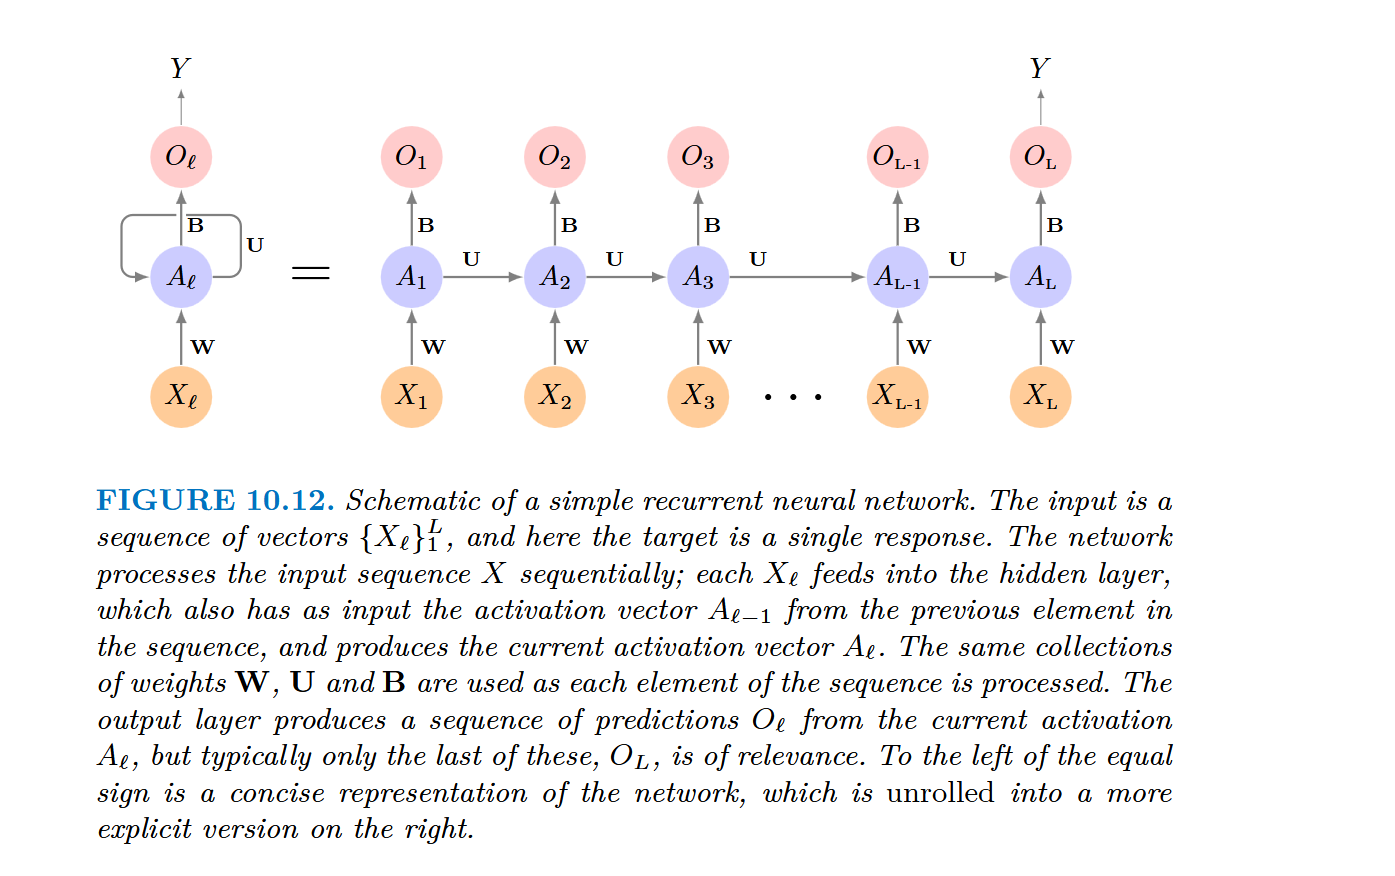

In [ ]:
class RNNNET(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        super(RNNNET, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.W_hh = nn.Linear(hidden_dim, hidden_dim)  # W^{(hh)} hidden layer 
        self.W_xh = nn.Linear(embedding_dim, hidden_dim)  # W^{(hx)} input layer
        self.W_ho = nn.Linear(hidden_dim, vocab_size)  # W^{(S)} output layer
        self.activation = nn.Tanh()

    def forward(self, inputs, hidden_state):
        #inputs : [seq_len, batch_size]
        #hidden_state : [1, batch_size , hidden_dim]
        seq_len, batch_size = inputs.shape
        outputs = []

        for t in range(seq_len):
            # Get the embedding of the current input word
            #Embed input at time t : [batch_size, embedding_dim]

            x_t = self.embedding(inputs[t])
            #x_t : [batch_size, embedding_dim]
            #Update hidden state
            hidden_state = self.activation(self.W_hh(hidden_state) + self.W_xh(x_t))

            # Compute output
            y_t = self.W_ho(hidden_state)
            output.append(y_t)

            # Stack outputs : [seq_len, batch_size, vocab_size]

            return torch.stack(outputs), hidden_state

# **Understanding the Programming Logic of the RNN Model**

This code implements a **vanilla recurrent neural network (RNN)** using PyTorch. The RNN processes sequences of word indices, updates its hidden state over time, and generates output predictions. Below is a **step-by-step breakdown** of the logic behind this implementation.

---

## **1. Class Definition and Initialization (`__init__` Method)**

### **Purpose**
The `__init__` method defines the **building blocks** of the RNN, including:
- Word embeddings
- Weight matrices for updating hidden states and generating outputs
- Activation function

### **Code Analysis**
```python
class RNNNET(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        super(RNNNET, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)  # Embedding layer
        self.W_hh = nn.Linear(hidden_dim, hidden_dim)  # Recurrent weight for hidden state update
        self.W_xh = nn.Linear(embedding_dim, hidden_dim)  # Weight for input to hidden state
        self.W_ho = nn.Linear(hidden_dim, vocab_size)  # Weight for hidden state to output
        self.activation = nn.Tanh()  # Activation function


 - 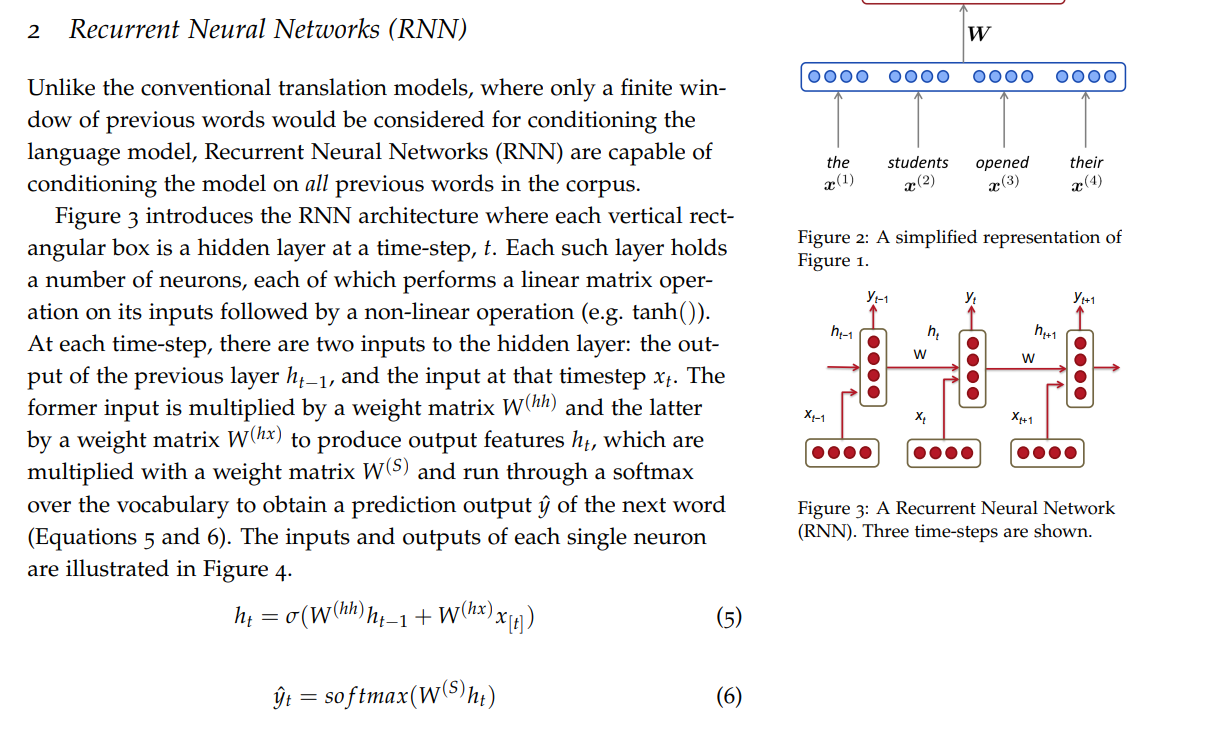
 - 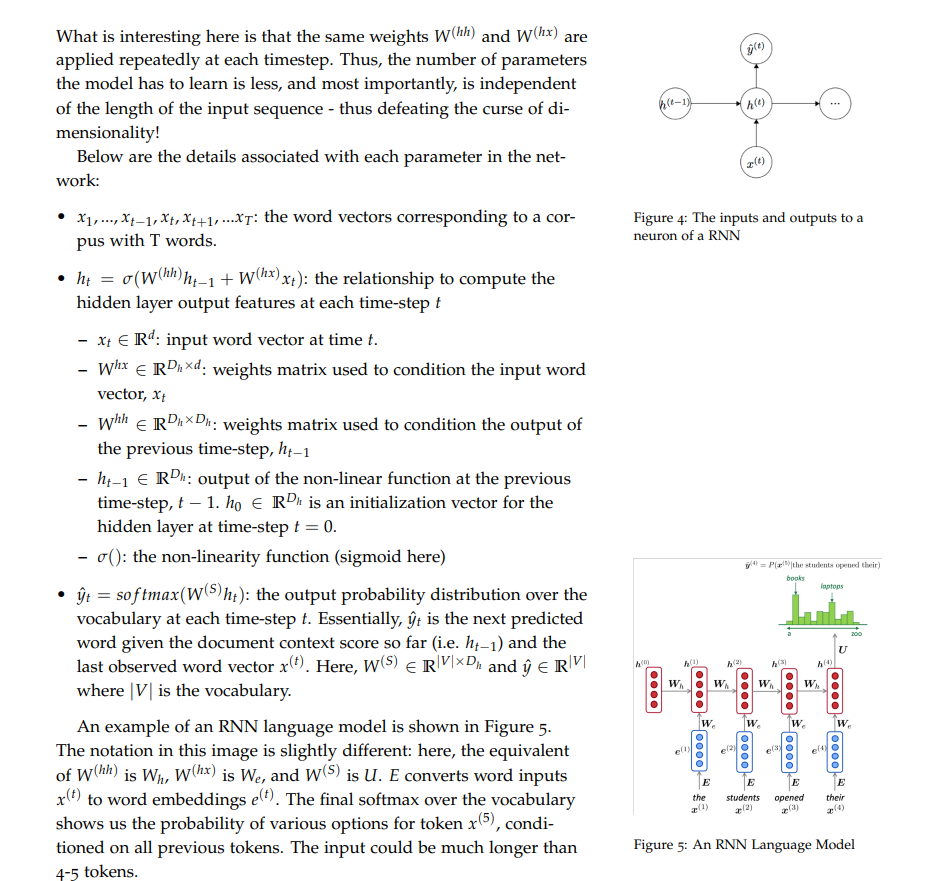


```markdown
#Understanding the Programming Logic of the RNN Model

This code implements a vanilla recurrent neural network (RNN) using PyTorch. The RNN processes sequences of word indices, updates its hidden state over time, and generates output predictions. Below is a step-by-step breakdown of the logic behind this implementation.

## 1. Class Definition and Initialization (`__init__` Method)

### Purpose
The `__init__` method defines the building blocks of the RNN, including:

- Word embeddings
- Weight matrices for updating hidden states and generating outputs
- Activation function

### Code Analysis
```python
class RNNNET(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        super(RNNNET, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)  # Embedding layer
        self.W_hh = nn.Linear(hidden_dim, hidden_dim)  # Recurrent weight for hidden state update
        self.W_xh = nn.Linear(embedding_dim, hidden_dim)  # Weight for input to hidden state
        self.W_ho = nn.Linear(hidden_dim, vocab_size)  # Weight for hidden state to output
        self.activation = nn.Tanh()  # Activation function
```

### Logical Flow
- **Embedding Layer (nn.Embedding)**: Converts word indices into dense embedding vectors of size (embedding_dim).
- **Recurrent Weight Matrices (W_hh, W_xh)**:
  - `W_hh`: Updates the hidden state based on the previous hidden state.
  - `W_xh`: Processes the current word input into a hidden representation.
- **Output Layer (W_ho)**: Transforms the hidden state into logits for vocabulary prediction.
- **Activation Function (Tanh)**: Introduces non-linearity into the hidden state update.

## 2. Forward Pass (`forward` Method)

### Purpose
The `forward` method defines how the RNN processes a sequence of inputs and updates its hidden state over time.

### Code Analysis
```python
def forward(self, inputs, hidden_state):
    # inputs : [seq_len, batch_size]
    # hidden_state : [1, batch_size, hidden_dim]
    
    seq_len, batch_size = inputs.shape  # Get sequence length and batch size
    outputs = []  # List to store outputs at each time step

    for t in range(seq_len):  # Loop through each time step
        # Get the embedding of the current input word
        x_t = self.embedding(inputs[t])  
        # x_t : [batch_size, embedding_dim]

        # Update hidden state
        hidden_state = self.activation(self.W_hh(hidden_state) + self.W_xh(x_t))

        # Compute output logits
        y_t = self.W_ho(hidden_state)  # y_t : [batch_size, vocab_size]

        outputs.append(y_t)  # Store output for this time step

    # Stack outputs to create tensor: [seq_len, batch_size, vocab_size]
    return torch.stack(outputs), hidden_state
```

### Logical Flow
- **Extract seq_len and batch_size from inputs**:
  - The input is a tensor of word indices with shape [seq_len, batch_size].
  - `seq_len`: The number of words in the sequence.
  - `batch_size`: The number of sequences processed at once.
- **Iterate Through the Sequence (for t in range(seq_len))**:
  - The loop processes one word at a time (similar to reading text sequentially).
- **Retrieve Embedding for Current Word (x_t)**:
  - `self.embedding(inputs[t])` converts word index `inputs[t]` into a dense vector [batch_size, embedding_dim].
- **Compute New Hidden State**:
  - The hidden state update follows the standard RNN equation:
    \[
    h_t = \tanh(W_{hh} h_{t-1} + W_{xh} x_t)
    \]
  - `W_hh(hidden_state)`: Contribution from the previous hidden state.
  - `W_xh(x_t)`: Contribution from the current word.
  - `Tanh`: Non-linearity is applied.
- **Compute Output (y_t)**:
  - `y_t = self.W_ho(hidden_state)` generates logits (unnormalized scores for words in the vocabulary).
- **Store Output (outputs.append(y_t))**:
  - Each time step's output is saved for later.
- **Return Stacked Outputs (torch.stack(outputs))**:
  - The list of outputs is converted into a single tensor of shape [seq_len, batch_size, vocab_size].

## 3. Issues in the Code

### Problem: Incorrect return Placement
The return statement is inside the loop, meaning the function exits after the first time step instead of iterating through all time steps.

### Fix: Move return Outside the Loop

**Incorrect**
```python
return torch.stack(outputs), hidden_state  # This is inside the loop! ❌
```

**Corrected Code**
```python
def forward(self, inputs, hidden_state):
    seq_len, batch_size = inputs.shape
    outputs = []

    for t in range(seq_len):
        x_t = self.embedding(inputs[t])
        hidden_state = self.activation(self.W_hh(hidden_state) + self.W_xh(x_t))
        y_t = self.W_ho(hidden_state)
        outputs.append(y_t)  # Append output at each step

    return torch.stack(outputs), hidden_state  # Return after processing all timesteps ✅
```

## Final Logical Flow of the Model
1. Initialize weights and embeddings.
2. Process the sequence word-by-word using embeddings.
3. Update the hidden state using both the current word and the previous hidden state.
4. Compute the output at each step.
5. Return the outputs and the final hidden state.

## Summary
- The code implements a simple vanilla RNN in PyTorch.
- Embeddings are used to map words to dense vectors.
- The hidden state is iteratively updated using the previous state and the new input.
- The model outputs a sequence of logits for vocabulary prediction.
- A bug exists in the return statement's placement, which needs to be fixed.
```